In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers[torch]
!pip install datasets
!pip install transformers datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 4.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

# 데이터 불러오기

In [3]:
DF = pd.read_csv('/content/drive/MyDrive/Final.csv')
DF['product'] = DF['product'].replace('Money transfer, virtual currency, or money service', 'Money transfer')
DF= DF[['consumer complaint narrative','product','issue']]
DF

,consumer complaint narrative,product,issue
0,I made a purchase with XXXX to purchase a prod...,Credit card,Problem with a purchase shown on your statement
1,i asked the JC Penny store employee if there w...,Credit card,Getting a credit card
2,"Synchrony Bank, who owns the stores credit car...",Credit card,Closing your account
3,This bank doesnt value me as a customer or my ...,Credit card,"Other features, terms, or problems"
4,Purchase from XXXX on XX/XX/XXXX XXXX XXXX on ...,Credit card,Problem with a purchase shown on your statement
...,...,...,...
1326536,XX/XX/2022 Truist checking account fraudulentl...,Checking or savings account,Opening an account
1326537,We had 3 savings/investment account that were ...,Checking or savings account,Managing an account
1326538,Please refer all my complaints about Keybank. ...,Checking or savings account,Closing an account
1326539,There is a company name XXXX which provides t...,Checking or savings account,Problem with a lender or other company chargin...


In [4]:
DF = DF[DF['product'] == 'Payday loan']
DF

,consumer complaint narrative,product,issue
95113,I had my furnace replaced by XXXX. Set up the ...,Payday loan,Charged fees or interest you didn't expect
95114,On XX/XX/XXXX I went into the Title Max locate...,Payday loan,Struggling to pay your loan
95115,I have a loan with family choice financial. My...,Payday loan,Struggling to pay your loan
95116,I am an XXXX XXXX military member ( XXXX XXXX ...,Payday loan,Charged fees or interest you didn't expect
95117,My loan was sold to SST due to the company by ...,Payday loan,Struggling to pay your loan
...,...,...,...
103451,I had A loan from loan till payday and they st...,Payday loan,Charged fees or interest you didn't expect
103452,"While making payments, I discovered that I am ...",Payday loan,Charged fees or interest you didn't expect
103453,cash one has charged me outrageous interest an...,Payday loan,Charged fees or interest you didn't expect
103454,I have recently been made aware of the Louisia...,Payday loan,Charged fees or interest you didn't expect


# 자연어처리

In [5]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
data = list(DF['consumer complaint narrative'])
clean = []
for narrative in (data):
 clean_narrative = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…\"\“》XXXX{}]', '', narrative)
 clean.append(clean_narrative)
DF['narrative'] = clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [6]:
lower = [text.lower() for text in DF['narrative'].values]
DF['narrative'] = lower

In [7]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

DF["narrative"]=DF["narrative"].apply(lambda x: remove_stopwords(x))

DF.head()

,consumer complaint narrative,product,issue,narrative
95113,I had my furnace replaced by XXXX. Set up the ...,Payday loan,Charged fees or interest you didn't expect,furnace replaced set loan supposed 599 fixed s...
95114,On XX/XX/XXXX I went into the Title Max locate...,Payday loan,Struggling to pay your loan,went title max located entered agreement 55000...
95115,I have a loan with family choice financial. My...,Payday loan,Struggling to pay your loan,loan family choice financial loan comes due mo...
95116,I am an XXXX XXXX military member ( XXXX XXXX ...,Payday loan,Charged fees or interest you didn't expect,military member entered currently stationed so...
95117,My loan was sold to SST due to the company by ...,Payday loan,Struggling to pay your loan,loan sold sst due company name longer business...


# 데이터 추출 및 컬럼명 변경

In [8]:
DF_test = DF[['narrative','issue']]
DF_test.columns = ['text', 'label']
DF_test

,text,label
95113,furnace replaced set loan supposed 599 fixed s...,Charged fees or interest you didn't expect
95114,went title max located entered agreement 55000...,Struggling to pay your loan
95115,loan family choice financial loan comes due mo...,Struggling to pay your loan
95116,military member entered currently stationed so...,Charged fees or interest you didn't expect
95117,loan sold sst due company name longer business...,Struggling to pay your loan
...,...,...
103451,loan loan till payday started charging fees un...,Charged fees or interest you didn't expect
103452,making payments discovered charged ridiculous ...,Charged fees or interest you didn't expect
103453,cash one charged outrageous interest fees payd...,Charged fees or interest you didn't expect
103454,recently made aware louisian scra benefits act...,Charged fees or interest you didn't expect


# 데이터 분할

In [9]:
x = DF_test
Y = DF_test['label']
x_train, x_test, y_train, y_test = train_test_split(x, Y,test_size = 0.1, stratify = Y)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7508, 2) (7508,) (835, 2) (835,)


In [10]:
x_train.head()

,text,label
96736,two incidents bought car pay personal loan sai...,Charged fees or interest you didn't expect
100018,receive loan information online telephone told...,Charged fees or interest you didn't expect
97147,year making monthly payment time cant see stat...,Problem when making payments
100547,due financial hardships took loan 30000 15000 ...,Problem when making payments
98524,received call attempt locate name popped calle...,Struggling to pay your loan


In [11]:
x_test

,text,label
98004,basically copy sent lending club 2020 today st...,Problem when making payments
95750,loan payments due every month convenience chos...,Charged fees or interest you didn't expect
99630,navy federal credit union refused disclose amo...,Charged fees or interest you didn't expect
102819,ace payday loans charge outrageous illegal int...,Charged fees or interest you didn't expect
103003,husband needed roof fixed shingles falling roo...,Charged fees or interest you didn't expect
...,...,...
98472,owe wells fargo around 1000000 personal line c...,Struggling to pay your loan
96450,company offered 280000 loan husband 24 interes...,Charged fees or interest you didn't expect
102042,received garnishment taken paycheck amount 390...,Charged fees or interest you didn't expect
98678,speedy cash would let set arrangement pay work...,Struggling to pay your loan


# 데이터셋 만들기




In [12]:
import transformers
transformers.logging.set_verbosity_error()
import warnings; warnings.filterwarnings('ignore')
import os; os.environ['WANDB_DISABLED'] = 'true'
from datasets import Dataset,Features,Value,ClassLabel, DatasetDict

traindts = Dataset.from_pandas(x_train)
traindts = traindts.class_encode_column("label")
testdts = Dataset.from_pandas(x_test)
testdts = testdts.class_encode_column("label")

Casting to class labels:   0%|          | 0/7508 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/835 [00:00<?, ? examples/s]

In [13]:
corpus = DatasetDict({"train" : traindts ,
                      "validation" : testdts })
corpus

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 7508
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 835
    })
})

# 토큰화

In [14]:
from transformers import RobertaConfig, RobertaModel, RobertaTokenizer

In [15]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [16]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [17]:
tokenized_corpus = corpus.map(preprocess_function, batched=True)

Map:   0%|          | 0/7508 [00:00<?, ? examples/s]

Map:   0%|          | 0/835 [00:00<?, ? examples/s]

# 패딩?

In [18]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding = True,max_length = 128)

# 성능평가 함수

In [19]:
import evaluate
accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

# 모델

In [20]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = (AutoModelForSequenceClassification.from_pretrained(
    "roberta-base", num_labels=3).to(device))

cuda


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [21]:
tokenized_corpus["validation"].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=["Charged fees or interest you didn't expect", 'Problem when making payments', 'Struggling to pay your loan'], id=None),
 '__index_level_0__': Value(dtype='int64', id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

# 빠인뜌닝

In [28]:
training_args = TrainingArguments(
    output_dir="best_model_Payday_loan",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_corpus["train"],
    eval_dataset=tokenized_corpus["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()
trainer.save_model()

{'eval_loss': 0.757184624671936, 'eval_accuracy': 0.7221556886227545, 'eval_runtime': 16.7268, 'eval_samples_per_second': 49.92, 'eval_steps_per_second': 3.169, 'epoch': 1.0}
{'train_runtime': 471.541, 'train_samples_per_second': 15.922, 'train_steps_per_second': 0.997, 'train_loss': 0.4384894188414229, 'epoch': 1.0}


In [23]:
pred_output = trainer.predict(tokenized_corpus["validation"])

In [24]:
import numpy as np

# Decode the predictions greedily using argmax (highest value of all classes)
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

Output Prediction:(835,)
Predictions: [1 0 0 0 0 2 0 0 1 0 0 2 0 0 0 2 2 0 2 0 0 1 0 0 0 0 0 2 0 2 0 0 2 1 0 0 2
 0 0 2 0 0 2 0 1 0 2 1 0 2 0 0 0 0 0 0 0 0 2 0 2 0 0 1 1 1 1 0 0 2 2 1 0 0
 0 2 0 1 0 1 0 0 2 0 0 0 2 2 0 0 0 2 0 1 1 2 0 0 0 2 0 0 0 1 1 0 2 1 1 1 0
 0 2 2 0 1 2 2 2 0 0 0 1 0 1 0 0 1 1 2 0 0 0 0 0 0 0 2 2 0 2 2 1 2 0 0 0 1
 0 0 0 0 0 2 2 0 1 2 2 0 0 0 0 0 0 0 2 0 0 0 0 1 2 2 2 0 0 0 1 2 2 2 0 0 0
 1 0 0 2 0 2 0 1 0 0 1 1 1 2 0 0 0 0 0 1 0 2 0 0 0 0 2 0 2 1 1 2 0 1 2 1 0
 0 2 1 1 1 0 0 0 0 1 2 0 1 0 0 1 2 2 0 0 1 0 0 0 0 2 0 0 2 2 2 0 0 0 0 0 2
 2 0 0 0 1 2 0 2 0 2 1 0 1 1 1 0 1 0 1 0 2 2 0 0 1 2 0 1 0 0 0 2 1 2 0 1 0
 0 0 1 1 1 1 0 1 0 0 1 0 0 1 2 1 1 0 1 0 0 2 2 2 1 1 0 0 0 1 0 0 0 2 1 0 2
 2 2 2 2 2 0 2 1 0 0 0 0 0 0 0 0 2 2 2 0 2 2 1 0 2 0 1 0 0 1 2 1 0 1 0 2 0
 1 0 0 1 0 1 0 2 2 2 0 0 2 2 0 1 0 0 0 2 0 2 2 1 0 2 2 0 2 2 0 1 2 1 2 0 2
 0 1 0 0 1 0 0 0 1 0 2 0 0 0 0 1 1 2 0 0 0 1 0 1 2 0 2 2 2 1 0 0 0 0 0 2 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 2 0 2 0 2 2 2 1 2 0 0 2 0 1 2

In [25]:
labels = tokenized_corpus["train"].features["label"].names
y_valid = np.array(tokenized_corpus["validation"]['label'])

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(8,8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm.round(2).copy(), display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    plt.tight_layout()
    plt.show()

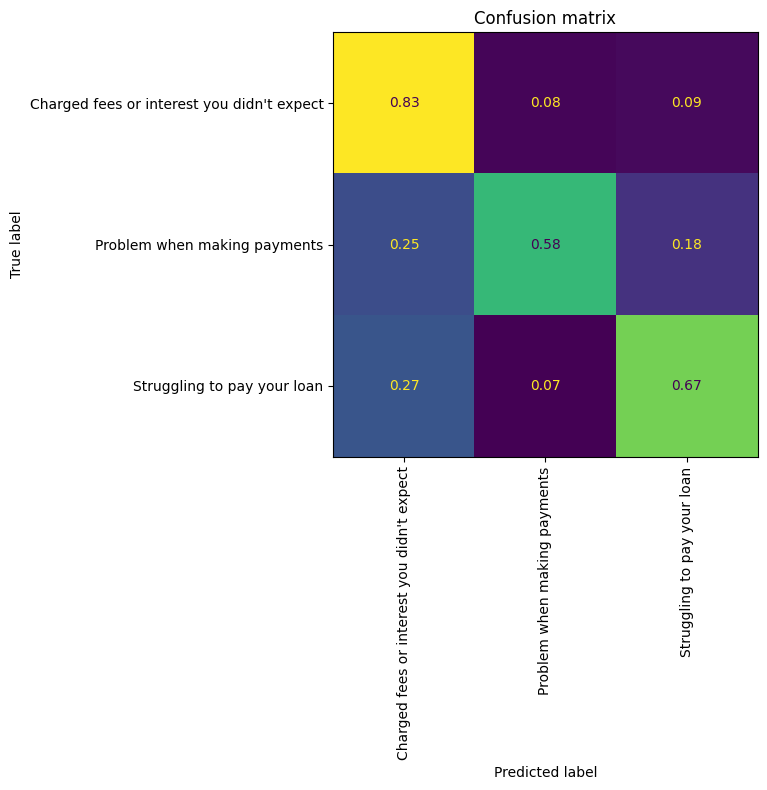

In [27]:
plot_confusion_matrix(y_preds,y_valid,labels)